In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
dataset = pd.read_csv("dataset/SocialNetworkAds.csv")
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred = classifier.predict(x_test)


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[61,  4],
       [ 5, 30]], dtype=int64)

C:\Users\DREAMWORLD\AppData\Local\Temp\ipykernel_1984\2420711503.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],


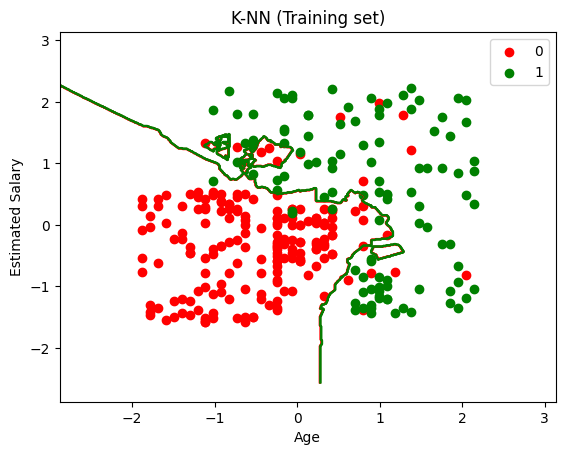

In [27]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max()+ 1, step= 0.01),
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+ 1, step= 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X1.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


C:\Users\DREAMWORLD\AppData\Local\Temp\ipykernel_1984\2684096398.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],


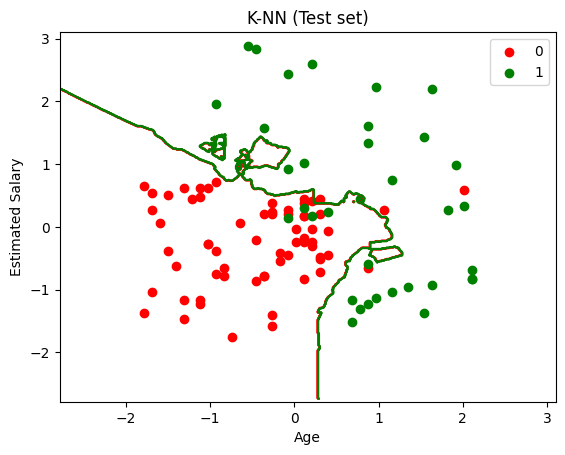

In [28]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max()+ 1, step= 0.01),
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+ 1, step= 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X1.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("K-NN (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
